In [9]:
from os import path
fname = path.expanduser('track.csv')

In [2]:
print('c:\path\to\nowhere.csv')

c:\path	o
owhere.csv


In [3]:
print(r'c:\path\to\nowhere.csv')

c:\path\to\nowhere.csv


In [10]:
!ls -lh "$fname"

-rwxrwxrwx@ 1 resitkadir  staff    43K Apr  7  2017 track.csv


In [11]:
path.getsize(fname)

43844

In [12]:
path.getsize(fname) / (1<<10)

42.81640625

In [13]:
!head "$fname"

time,lat,lng,height
2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422
2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211
2015-08-20 03:48:25.660,35.014871,32.519612,123.0
2015-08-20 03:48:26.819,35.014824,32.519654,120.5
2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789
2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789
2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789
2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219
2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219


In [14]:
with open(fname) as fp:
    for lnum, line in enumerate(fp):
        if lnum > 10:
            break
        print(line[:-1])

time,lat,lng,height
2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422
2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211
2015-08-20 03:48:25.660,35.014871,32.519612,123.0
2015-08-20 03:48:26.819,35.014824,32.519654,120.5
2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789
2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789
2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789
2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219
2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219
2015-08-20 03:48:37.708,35.014515,32.519625,121.69999694824219


In [15]:
!wc -l "$fname"

     741 track.csv


In [16]:
with open(fname) as fp:
    print(sum(1 for line in fp))

741


In [17]:
import pandas as pd

In [18]:
df = pd.read_csv(fname)

In [19]:
len(df)

740

In [20]:
df.columns

Index(['time', 'lat', 'lng', 'height'], dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    740 non-null    object 
 1   lat     740 non-null    float64
 2   lng     740 non-null    float64
 3   height  740 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.2+ KB


In [22]:
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
1,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


In [23]:
df.dtypes

time       object
lat       float64
lng       float64
height    float64
dtype: object

In [24]:
df = pd.read_csv(fname, parse_dates=['time'])

In [25]:
df.dtypes

time      datetime64[ns]
lat              float64
lng              float64
height           float64
dtype: object

In [26]:
df['lat']

0      35.015021
1      35.014954
2      35.014871
3      35.014824
4      35.014776
         ...    
735    35.014387
736    35.014355
737    35.014279
738    35.014264
739    35.014212
Name: lat, Length: 740, dtype: float64

In [27]:
df.lat

0      35.015021
1      35.014954
2      35.014871
3      35.014824
4      35.014776
         ...    
735    35.014387
736    35.014355
737    35.014279
738    35.014264
739    35.014212
Name: lat, Length: 740, dtype: float64

In [28]:
df[['lat', 'lng']]

,lat,lng
0,35.015021,32.519585
1,35.014954,32.519606
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689
...,...,...
735,35.014387,32.517020
736,35.014355,32.517035
737,35.014279,32.517087
738,35.014264,32.517098


In [29]:
df['lat'][0]

35.015021

In [30]:
df.loc[0]

time      2015-08-20 03:48:07.235000
lat                        35.015021
lng                        32.519585
height                    136.199997
Name: 0, dtype: object

In [31]:
df.loc[2:7]

,time,lat,lng,height
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002
5,2015-08-20 03:48:29.720,35.014704,32.519691,119.900002
6,2015-08-20 03:48:30.669,35.014657,32.519734,120.900002
7,2015-08-20 03:48:33.793,35.014563,32.519719,121.699997


In [32]:
df[['lat', 'lng']][2:7]

,lat,lng
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689
5,35.014704,32.519691
6,35.014657,32.519734


In [33]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [34]:
import numpy as np
df1 = pd.DataFrame(np.arange(10).reshape((5,2)), columns=['x', 'y'], index=['a', 'b', 'c', 'd', 'e'])
df1

,x,y
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


In [35]:
df1.loc['a']

x    0
y    1
Name: a, dtype: int64

In [36]:
df1.loc['b': 'd']

,x,y
b,2,3
c,4,5
d,6,7


In [37]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [38]:
df.index = df['time']
df.index

DatetimeIndex(['2015-08-20 03:48:07.235000', '2015-08-20 03:48:24.734000',
               '2015-08-20 03:48:25.660000', '2015-08-20 03:48:26.819000',
               '2015-08-20 03:48:27.828000', '2015-08-20 03:48:29.720000',
               '2015-08-20 03:48:30.669000', '2015-08-20 03:48:33.793000',
               '2015-08-20 03:48:34.869000', '2015-08-20 03:48:37.708000',
               ...
               '2015-08-20 04:20:18.844000', '2015-08-20 04:20:21.996000',
               '2015-08-20 04:20:22.897000', '2015-08-20 04:20:24.905000',
               '2015-08-20 04:20:25.835000', '2015-08-20 04:20:28.982000',
               '2015-08-20 04:20:29.923000', '2015-08-20 04:20:32.863000',
               '2015-08-20 04:20:33.994000', '2015-08-20 04:20:42.329000'],
              dtype='datetime64[ns]', name='time', length=740, freq=None)

In [39]:
df.loc['2015-08-20 04:18:54']

,time,lat,lng,height
time,,,,
2015-08-20 04:18:54.007,2015-08-20 04:18:54.007,35.015942,32.515209,117.099998
2015-08-20 04:18:54.893,2015-08-20 04:18:54.893,35.015937,32.515240,117.500000


In [40]:
df.loc['2015-08-20 03:48']

,time,lat,lng,height
time,,,,
2015-08-20 03:48:07.235,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
2015-08-20 03:48:24.734,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2015-08-20 03:48:25.660,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
2015-08-20 03:48:26.819,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
2015-08-20 03:48:27.828,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002
2015-08-20 03:48:29.720,2015-08-20 03:48:29.720,35.014704,32.519691,119.900002
2015-08-20 03:48:30.669,2015-08-20 03:48:30.669,35.014657,32.519734,120.900002
2015-08-20 03:48:33.793,2015-08-20 03:48:33.793,35.014563,32.519719,121.699997
2015-08-20 03:48:34.869,2015-08-20 03:48:34.869,35.014549,32.519694,121.199997


In [41]:
import pytz

In [42]:
ts = df.index[0]

In [43]:
ts.tz_localize(pytz.UTC)

Timestamp('2015-08-20 03:48:07.235000+0000', tz='UTC')

In [44]:
ts.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Asia/Jerusalem'))

Timestamp('2015-08-20 06:48:07.235000+0300', tz='Asia/Jerusalem')

In [45]:
df.index = df.index.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Asia/Jerusalem'))
df.index[:10]

DatetimeIndex(['2015-08-20 06:48:07.235000+03:00',
               '2015-08-20 06:48:24.734000+03:00',
               '2015-08-20 06:48:25.660000+03:00',
               '2015-08-20 06:48:26.819000+03:00',
               '2015-08-20 06:48:27.828000+03:00',
               '2015-08-20 06:48:29.720000+03:00',
               '2015-08-20 06:48:30.669000+03:00',
               '2015-08-20 06:48:33.793000+03:00',
               '2015-08-20 06:48:34.869000+03:00',
               '2015-08-20 06:48:37.708000+03:00'],
              dtype='datetime64[ns, Asia/Jerusalem]', name='time', freq=None)

In [46]:
%pwd

'/Users/resitkadir/Desktop/Python-mix/6-Ex_Files_Data_Science_Python/Exercise Files/Ch06_foulim_geo/06_02'

In [47]:
import geo

In [48]:
1

1

In [49]:
import sys
sys.path

['/Users/resitkadir/Desktop/Python-mix/6-Ex_Files_Data_Science_Python/Exercise Files/Ch06_foulim_geo/06_02',
 '/opt/anaconda3/lib/python38.zip',
 '/opt/anaconda3/lib/python3.8',
 '/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.8/site-packages',
 '/opt/anaconda3/lib/python3.8/site-packages/aeosa',
 '/opt/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg',
 '/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/resitkadir/.ipython']

In [50]:
??geo

In [52]:
from geo import circle_dist

In [53]:
lat1, lng1 = df.iloc[0].lat, df.iloc[0].lng
lat2, lng2 = df.iloc[1].lat, df.iloc[1].lng

In [54]:
circle_dist(lat1, lng1, lat2, lng2)

0.007693931535344109

In [55]:
s = pd.Series(np.arange(5))

In [56]:
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [57]:
s.shift()

0    NaN
1    0.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [58]:
s.shift(-1)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [59]:
dist = circle_dist(df['lat'], df['lng'], df['lat'].shift(), df['lng'].shift())

In [60]:
dist[:10]

time
2015-08-20 06:48:07.235000+03:00         NaN
2015-08-20 06:48:24.734000+03:00    0.007694
2015-08-20 06:48:25.660000+03:00    0.009248
2015-08-20 06:48:26.819000+03:00    0.006479
2015-08-20 06:48:27.828000+03:00    0.006219
2015-08-20 06:48:29.720000+03:00    0.008010
2015-08-20 06:48:30.669000+03:00    0.006534
2015-08-20 06:48:33.793000+03:00    0.010545
2015-08-20 06:48:34.869000+03:00    0.002759
2015-08-20 06:48:37.708000+03:00    0.007336
dtype: float64

In [61]:
dist.sum()

4.688129576754895

In [62]:
dt = df['time'] - df['time'].shift()

In [63]:
dt[:10]

time
2015-08-20 06:48:07.235000+03:00                      NaT
2015-08-20 06:48:24.734000+03:00   0 days 00:00:17.499000
2015-08-20 06:48:25.660000+03:00   0 days 00:00:00.926000
2015-08-20 06:48:26.819000+03:00   0 days 00:00:01.159000
2015-08-20 06:48:27.828000+03:00   0 days 00:00:01.009000
2015-08-20 06:48:29.720000+03:00   0 days 00:00:01.892000
2015-08-20 06:48:30.669000+03:00   0 days 00:00:00.949000
2015-08-20 06:48:33.793000+03:00   0 days 00:00:03.124000
2015-08-20 06:48:34.869000+03:00   0 days 00:00:01.076000
2015-08-20 06:48:37.708000+03:00   0 days 00:00:02.839000
Name: time, dtype: timedelta64[ns]

In [64]:
dt.sum()

Timedelta('0 days 00:32:35.094000')

In [65]:
dt[1].total_seconds()

17.499

In [66]:
dt[1] / np.timedelta64(1, 'h')

0.004860833333333333

In [67]:
dt[1].total_seconds()/3600

0.004860833333333333

In [68]:
speed = dist / (dt / np.timedelta64(1, 'h'))

In [69]:
speed[:10]

time
2015-08-20 06:48:07.235000+03:00          NaN
2015-08-20 06:48:24.734000+03:00     1.582842
2015-08-20 06:48:25.660000+03:00    35.954340
2015-08-20 06:48:26.819000+03:00    20.123165
2015-08-20 06:48:27.828000+03:00    22.187213
2015-08-20 06:48:29.720000+03:00    15.240609
2015-08-20 06:48:30.669000+03:00    24.786457
2015-08-20 06:48:33.793000+03:00    12.151207
2015-08-20 06:48:34.869000+03:00     9.230505
2015-08-20 06:48:37.708000+03:00     9.302840
dtype: float64

In [70]:
df['dist'] = dist
df['dt'] = dt

In [71]:
df1m = df.resample('1min').sum()

In [72]:
df1m.index

DatetimeIndex(['2015-08-20 06:48:00+03:00', '2015-08-20 06:49:00+03:00',
               '2015-08-20 06:50:00+03:00', '2015-08-20 06:51:00+03:00',
               '2015-08-20 06:52:00+03:00', '2015-08-20 06:53:00+03:00',
               '2015-08-20 06:54:00+03:00', '2015-08-20 06:55:00+03:00',
               '2015-08-20 06:56:00+03:00', '2015-08-20 06:57:00+03:00',
               '2015-08-20 06:58:00+03:00', '2015-08-20 06:59:00+03:00',
               '2015-08-20 07:00:00+03:00', '2015-08-20 07:01:00+03:00',
               '2015-08-20 07:02:00+03:00', '2015-08-20 07:03:00+03:00',
               '2015-08-20 07:04:00+03:00', '2015-08-20 07:05:00+03:00',
               '2015-08-20 07:06:00+03:00', '2015-08-20 07:07:00+03:00',
               '2015-08-20 07:08:00+03:00', '2015-08-20 07:09:00+03:00',
               '2015-08-20 07:10:00+03:00', '2015-08-20 07:11:00+03:00',
               '2015-08-20 07:12:00+03:00', '2015-08-20 07:13:00+03:00',
               '2015-08-20 07:14:00+03:00', '2015-0

In [73]:
df1m.columns

Index(['lat', 'lng', 'height', 'dist'], dtype='object')

In [74]:
df['dt'] = dt / np.timedelta64(1, 'h')
df1m = df.resample('1min').sum()
speed1m = df1m['dist'] / df1m['dt']

In [75]:
speed1m[:10]

time
2015-08-20 06:48:00+03:00     8.127464
2015-08-20 06:49:00+03:00     7.579874
2015-08-20 06:50:00+03:00     9.127858
2015-08-20 06:51:00+03:00    10.220285
2015-08-20 06:52:00+03:00    10.114859
2015-08-20 06:53:00+03:00     9.687869
2015-08-20 06:54:00+03:00    10.855848
2015-08-20 06:55:00+03:00    10.891783
2015-08-20 06:56:00+03:00    10.270465
2015-08-20 06:57:00+03:00     6.629372
Freq: T, dtype: float64

In [76]:
speed1m.describe()

count    33.000000
mean      8.658208
std       1.543125
min       5.287285
25%       7.542752
50%       8.537741
75%      10.220285
max      10.891783
dtype: float64

In [77]:
%matplotlib inline

<AxesSubplot:xlabel='time'>

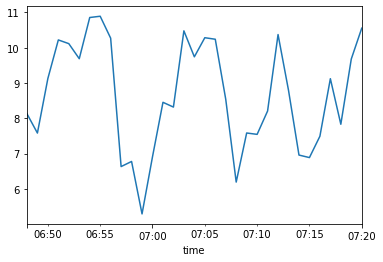

In [78]:
speed1m.plot()

In [79]:
import matplotlib.pyplot as plt

In [80]:
plt.rcParams['figure.figsize'] = (10, 6)

In [81]:
plt.style.use('seaborn-whitegrid')

<AxesSubplot:xlabel='time'>

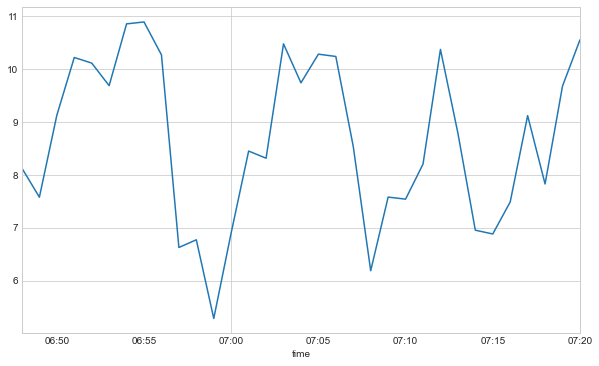

In [82]:
speed1m.plot()

<AxesSubplot:>

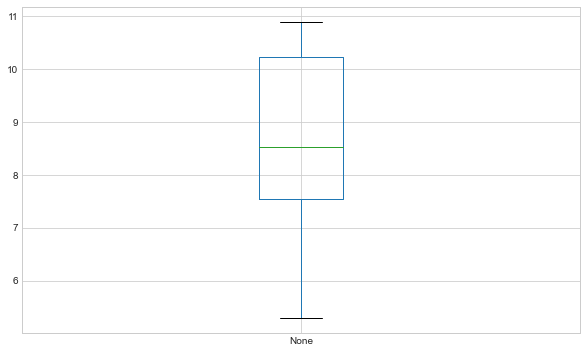

In [83]:
speed1m.plot.box()

In [84]:
#!pip install folium

In [92]:
df.head(3)

,time,lat,lng,height,dist,dt
time,,,,,,
2015-08-20 06:48:07.235000+03:00,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997,NaN,NaN
2015-08-20 06:48:24.734000+03:00,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998,0.007694,0.004861
2015-08-20 06:48:25.660000+03:00,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000,0.009248,0.000257


In [85]:
import folium

In [97]:
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)
mdf = df.resample('T').mean()

def add_marker(row):
    marker = folium.CircleMarker([row['lng'], row['lat']], radius=5, color='red', popup=row.name.strftime('%H:%M'))
    marker.add_to(m)

mdf.apply(add_marker, axis=1)
m

In [88]:
from shapely.geometry import Point, Polygon

In [90]:
poly = Polygon([[0, 0], [0, 10], [10, 10], [10, 0]])

In [99]:
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)
mdf = df.resample('T').mean()
mdf['pt'] = mdf[['lng', 'lat']].apply(Point, axis=1)

def add_marker(row):
    color = 'yellow' if poly.intersects(row['pt']) else 'green'
    marker = folium.CircleMarker([row['lng'], row['lat']], radius=5, color='red', popup=row.name.strftime('%H:%M'),
                                fill_color=color)
    marker.add_to(m)
m.add_child(folium.PolyLine(np.stack(poly.exterior.xy).T, color='yellow'))
mdf.apply(add_marker, axis=1)
m